In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy

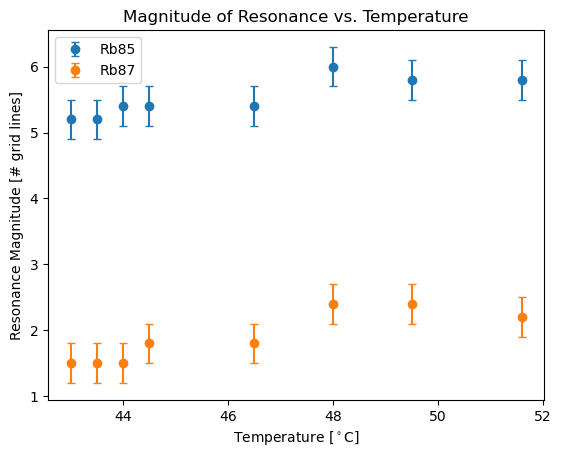

In [3]:
t = np.array([51.6, 49.5, 48, 46.5, 44.5, 44, 43.5, 43])
rb85 = np.array([5.8, 5.8, 6, 5.4, 5.4, 5.4, 5.2,5.2])
rb87 = np.array([2.2, 2.4, 2.4, 1.8, 1.8, 1.5, 1.5, 1.5])

plt.errorbar(t, rb85, yerr=0.3, fmt = 'o', capsize = 3)
plt.errorbar(t, rb87, yerr=0.3, fmt = 'o', capsize = 3)
plt.title("Magnitude of Resonance vs. Temperature")
plt.xlabel("Temperature [$^\\circ$C]")
plt.ylabel("Resonance Magnitude [# grid lines]")
plt.legend(["Rb85", "Rb87"])
plt.show()

In [4]:
rb85_res_negPolarity = np.array([1.85, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
rb85_current_negPolarity = -1 * np.array([1.008, 1.08, 1.13, 1.179, 1.229, 1.279, 1.328, 1.376])
rb85_error_negPolarity = np.array([0.001, 0.001, 0.001, 0.002, 0.004, 0.005, 0.007, 0.007])

rb85_res_posPolarity = np.array([1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
rb85_current_posPolarity = np.array([0.981, 1.029, 1.079, 1.128, 1.179, 1.229, 1.279, 1.327, 1.377])
rb85_error_posPolarity = np.array([0.001, 0.004, 0.003, 0.006, 0.005, 0.004, 0.007, 0.006, 0.004])

rb87_res_negPolarity = np.array([2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4])
rb87_current_negPolarity = -1 * np.array([1.013, 1.046, 1.079, 1.112, 1.145, 1.178, 1.210])
rb87_error_negPolarity = np.array([0.003, 0.003, 0.003, 0.005, 0.005, 0.005, 0.006])

rb87_res_posPolarity = np.array([2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4])
rb87_current_posPolarity = np.array([1.015, 1.048, 1.081, 1.115, 1.148, 1.180, 1.213])
rb87_error_posPolarity = np.array([0.003, 0.003, 0.004, 0.003, 0.004, 0.006, 0.005])

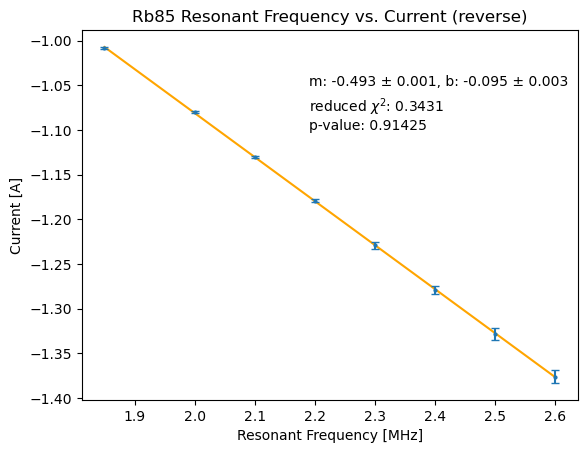

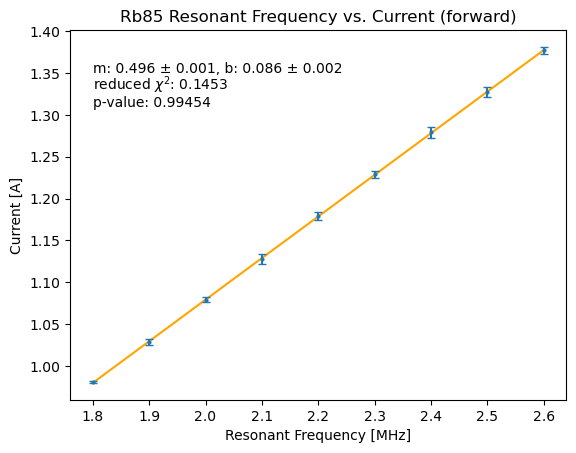

In [5]:
def linear(x, m, b):
    return m * x + b

def analyze(function, xdata, ydata, yerr):
    
    lin, cov = opt.curve_fit(function, xdata, ydata)
    m_opt, b_opt = lin
    m_err, b_err = np.sqrt(np.diag(cov))

    fit_vals = m_opt * xdata + b_opt

    chisq = np.sum(((ydata - fit_vals)/(yerr))**2)
    chisq_reduced = np.round(chisq/(len(xdata) - 2), 4)

    p_value = scipy.stats.chi2.sf(chisq, len(xdata) - 2) # survival function, defined as 1 - cdf
    
    return m_opt, m_err, b_opt, b_err, chisq_reduced, p_value
    
m_opt_rb85_neg, m_err_rb85_neg, b_opt_rb85_neg, b_err_rb85_neg, chisq_reduced, p_value = analyze(linear, rb85_res_negPolarity, rb85_current_negPolarity, rb85_error_negPolarity)

# plt.scatter(rb85_res, -rb85_current)
plt.plot(rb85_res_negPolarity, linear(rb85_res_negPolarity, m_opt_rb85_neg, b_opt_rb85_neg), c = 'orange')
plt.errorbar(rb85_res_negPolarity, rb85_current_negPolarity, yerr = rb85_error_negPolarity, fmt = 'o', capsize=3, markersize = 2)
plt.text(2.19, -1.05, f"m: {np.round(m_opt_rb85_neg, 3)} \u00b1 {np.round(m_err_rb85_neg, 3)}, b: {np.round(b_opt_rb85_neg, 3)} \u00b1 {np.round(b_err_rb85_neg, 3)}")
plt.text(2.19, -1.08, f"reduced $\\chi^2$: {chisq_reduced}")
plt.text(2.19, -1.10, f"p-value: {np.round(p_value, 5)}")
plt.title("Rb85 Resonant Frequency vs. Current (reverse)")
plt.xlabel("Resonant Frequency [MHz]")
plt.ylabel("Current [A]")

plt.show()

m_opt_rb85_pos, m_err_rb85_pos, b_opt_rb85_pos, b_err_rb85_pos, chisq_reduced, p_value = analyze(linear, rb85_res_posPolarity, rb85_current_posPolarity, rb85_error_posPolarity)

# plt.scatter(rb85_res, -rb85_current)
plt.plot(rb85_res_posPolarity, linear(rb85_res_posPolarity, m_opt_rb85_pos, b_opt_rb85_pos), c = 'orange')
plt.errorbar(rb85_res_posPolarity, rb85_current_posPolarity, yerr = rb85_error_posPolarity, fmt = 'o', capsize=3, markersize = 2)
plt.text(1.8, 1.35, f"m: {np.round(m_opt_rb85_pos, 3)} \u00b1 {np.round(m_err_rb85_pos, 3)}, b: {np.round(b_opt_rb85_pos, 3)} \u00b1 {np.round(b_err_rb85_pos, 3)}")
plt.text(1.8, 1.33, f"reduced $\\chi^2$: {chisq_reduced}")
plt.text(1.8, 1.31, f"p-value: {np.round(p_value, 5)}")
plt.title("Rb85 Resonant Frequency vs. Current (forward)")
plt.xlabel("Resonant Frequency [MHz]")
plt.ylabel("Current [A]")

plt.show()

# analyze(linear, rb85_res_posPolarity, rb85_current_posPolarity, rb85_error_posPolarity)

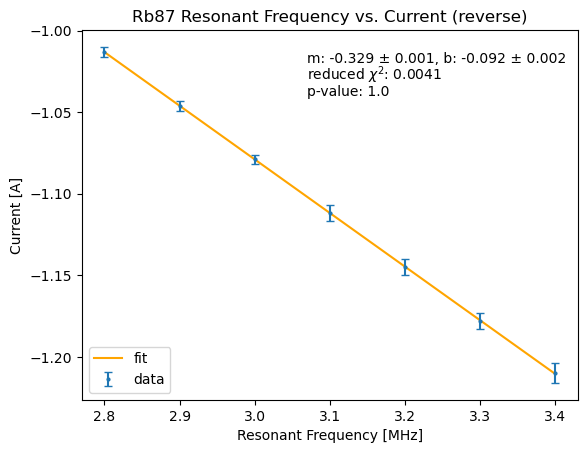

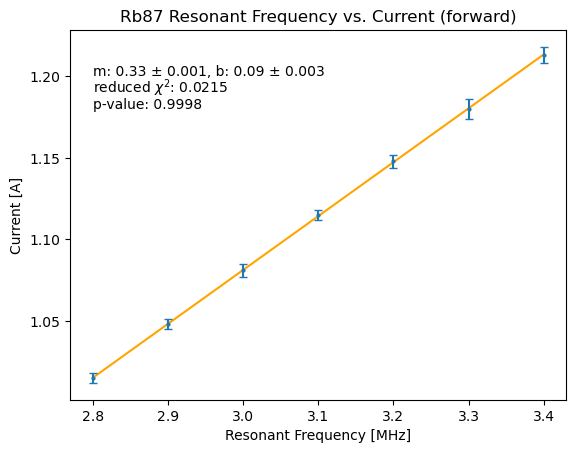

In [6]:
m_opt_rb87_neg, m_err_rb87_neg, b_opt_rb87_neg, b_err_rb87_neg, chisq_reduced, p_value = analyze(linear, rb87_res_negPolarity, rb87_current_negPolarity, rb87_error_negPolarity)

# plt.scatter(rb85_res, -rb85_current)
plt.plot(rb87_res_negPolarity, linear(rb87_res_negPolarity, m_opt_rb87_neg, b_opt_rb87_neg), c = 'orange')
plt.errorbar(rb87_res_negPolarity, rb87_current_negPolarity, yerr = rb87_error_negPolarity, fmt = 'o', capsize=3, markersize = 2)
plt.text(3.07, -1.02, f"m: {np.round(m_opt_rb87_neg, 3)} \u00b1 {np.round(m_err_rb87_neg, 3)}, b: {np.round(b_opt_rb87_neg, 3)} \u00b1 {np.round(b_err_rb87_neg, 3)}")
plt.text(3.07, -1.03, f"reduced $\\chi^2$: {chisq_reduced}")
plt.text(3.07, -1.04, f"p-value: {np.round(p_value, 5)}")
plt.title("Rb87 Resonant Frequency vs. Current (reverse)")
plt.xlabel("Resonant Frequency [MHz]")
plt.legend(["fit", "data"])
plt.ylabel("Current [A]")

plt.show()

m_opt_rb87_pos, m_err_rb87_pos, b_opt_rb87_pos, b_err_rb87_pos, chisq_reduced, p_value = analyze(linear, rb87_res_posPolarity, rb87_current_posPolarity, rb87_error_posPolarity)

# plt.scatter(rb85_res, -rb85_current)
plt.plot(rb87_res_posPolarity, linear(rb87_res_posPolarity, m_opt_rb87_pos, b_opt_rb87_pos), c = 'orange')
plt.errorbar(rb87_res_posPolarity, rb87_current_posPolarity, yerr = rb87_error_posPolarity, fmt = 'o', capsize=3, markersize = 2)
plt.text(2.8, 1.2, f"m: {np.round(m_opt_rb87_pos, 3)} \u00b1 {np.round(m_err_rb87_pos, 3)}, b: {np.round(b_opt_rb87_pos, 3)} \u00b1 {np.round(b_err_rb87_pos, 3)}")
plt.text(2.8, 1.19, f"reduced $\\chi^2$: {chisq_reduced}")
plt.text(2.8, 1.18, f"p-value: {np.round(p_value, 5)}")
plt.title("Rb87 Resonant Frequency vs. Current (forward)")
plt.xlabel("Resonant Frequency [MHz]")
plt.ylabel("Current [A]")

plt.show()

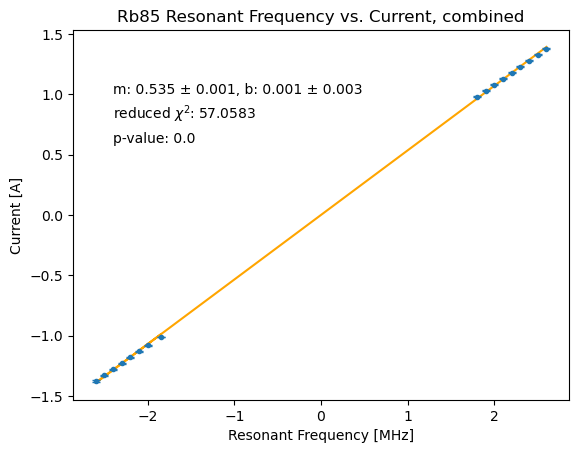

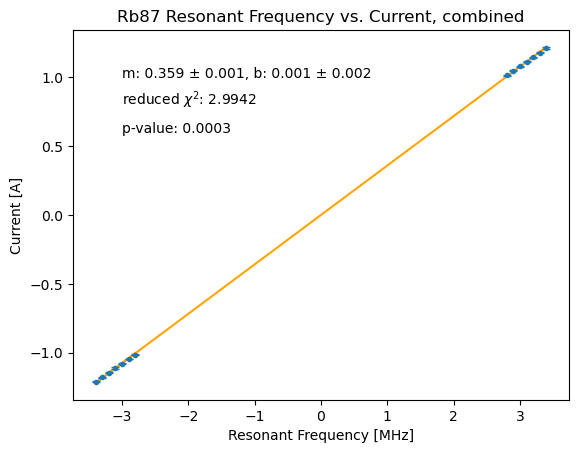

In [7]:
res_total = np.concatenate((-1 * rb85_res_negPolarity, rb85_res_posPolarity))
current_total = np.concatenate((rb85_current_negPolarity, rb85_current_posPolarity))
error_total = np.concatenate((rb85_error_negPolarity, rb85_error_posPolarity))
# print(rb85_res_total)

m_opt, m_err, b_opt, b_err, chisq_reduced, p_value = analyze(linear, res_total, current_total, error_total)

plt.plot(res_total, linear(res_total, m_opt, b_opt), c = 'orange')
plt.errorbar(res_total, current_total, yerr = error_total, fmt = 'o', capsize=3, markersize = 3)
plt.text(-2.4, 1, f"m: {np.round(m_opt, 3)} \u00b1 {np.round(m_err, 3)}, b: {np.round(b_opt, 3)} \u00b1 {np.round(b_err, 3)}")
plt.text(-2.4, 0.8, f"reduced $\\chi^2$: {chisq_reduced}")
plt.text(-2.4, 0.6, f"p-value: {np.round(p_value, 4)}")
plt.title("Rb85 Resonant Frequency vs. Current, combined")
plt.xlabel("Resonant Frequency [MHz]")
plt.ylabel("Current [A]")
plt.show()

res_total = np.concatenate((-1 * rb87_res_negPolarity, rb87_res_posPolarity))
current_total = np.concatenate((rb87_current_negPolarity, rb87_current_posPolarity))
error_total = np.concatenate((rb87_error_negPolarity, rb87_error_posPolarity))
# print(rb85_res_total)

m_opt, m_err, b_opt, b_err, chisq_reduced, p_value = analyze(linear, res_total, current_total, error_total)

plt.plot(res_total, linear(res_total, m_opt, b_opt), c = 'orange')
plt.errorbar(res_total, current_total, yerr = error_total, fmt = 'o', capsize=3, markersize = 3)
plt.text(-3, 1, f"m: {np.round(m_opt, 3)} \u00b1 {np.round(m_err, 3)}, b: {np.round(b_opt, 3)} \u00b1 {np.round(b_err, 3)}")
plt.text(-3, 0.8, f"reduced $\\chi^2$: {chisq_reduced}")
plt.text(-3, 0.6, f"p-value: {np.round(p_value, 4)}")
plt.title("Rb87 Resonant Frequency vs. Current, combined")
plt.xlabel("Resonant Frequency [MHz]")
plt.ylabel("Current [A]")
plt.show()

In [8]:
average_m_rb85 = (-m_opt_rb85_neg + m_opt_rb85_pos)/2
average_m_rb85_error = np.sqrt(m_err_rb85_neg**2 * 1/4 + m_err_rb85_pos**2 * 1/4)

average_m_rb87 = (-m_opt_rb87_neg + m_opt_rb87_pos)/2
average_m_rb87_error = np.sqrt(m_err_rb87_neg**2 * 1/4 + m_err_rb87_pos**2 * 1/4)

average_b_rb85 = (- b_opt_rb85_neg + b_opt_rb85_pos)/2
average_b_rb85_error = np.sqrt(b_err_rb85_neg**2 * 1/4 + b_err_rb85_pos**2 * 1/4)

average_b_rb87 = (- b_opt_rb87_neg + b_opt_rb87_pos)/2
average_b_rb87_error = np.sqrt(b_err_rb87_neg**2 * 1/4 + b_err_rb87_pos**2 * 1/4)

print(f"Rb85: {average_m_rb85} \u00b1 {average_m_rb85_error}")
print(f"Rb87: {average_m_rb87} \u00b1 {average_m_rb87_error}")

alpha = 32 * np.pi * 135/(5 * np.sqrt(5) * 0.275) * 1e-3
# print(alpha)
I_rb85 = 0.5 * (alpha * average_m_rb85 * 2.799- 1)
I_rb85_error = average_m_rb85_error * (2.799 * alpha)/2

print(f"I for Rb85: {0.5 * (alpha * average_m_rb85 * 2.799- 1)} \u00b1 {average_m_rb85_error * (2.799 * alpha)/2}")
print(f"I for Rb87: {0.5 * (alpha * average_m_rb87 * 2.799- 1)} \u00b1 {average_m_rb87_error * (2.799 * alpha)/2}")

Rb85: 0.4946546478470668 ± 0.0007928589257177276
Rb87: 0.3296428565330668 ± 0.0005868455186037656
I for Rb85: 2.5557717816003933 ± 0.004897954446689631
I for Rb87: 1.5363971982960622 ± 0.0036252888428584267


In [9]:
# gets the range of current values
current_range_posPolarity = np.linspace(min(rb85_current_posPolarity[0], rb87_current_posPolarity[0]), max(rb85_current_posPolarity[-1], rb87_current_posPolarity[-1]), 20)

rb85_res_range_posPolarity = (- average_b_rb85 + current_range_posPolarity)/average_m_rb85
rb85_res_range_posPolarity_error = np.sqrt(average_b_rb85_error**2 * (1/average_m_rb85)**2 + average_m_rb85_error**2 * ((average_b_rb85 - current_range_posPolarity)/(average_m_rb85**2))**2)

rb87_res_range_posPolarity = (- average_b_rb87 + current_range_posPolarity)/average_m_rb87
rb87_res_range_posPolarity_error = np.sqrt(average_b_rb87_error**2 * (1/average_m_rb87)**2 + average_m_rb87_error**2 * ((average_b_rb87 - current_range_posPolarity)/(average_m_rb87**2))**2)

nuclear_ratio_posPolarity = rb85_res_range_posPolarity/rb87_res_range_posPolarity
nuclear_ratio_posPolarity_error = np.sqrt(rb85_res_range_posPolarity_error * (1/rb85_res_range_posPolarity)**2 + rb87_res_range_posPolarity_error**2 * (rb85_res_range_posPolarity/rb87_res_range_posPolarity**2)**2)

# print(np.mean(nuclear_ratio_posPolarity), np.std(nuclear_ratio_posPolarity))
print(f"Positive polarity: {np.mean(nuclear_ratio_posPolarity)} \u00b1 {np.mean(nuclear_ratio_posPolarity_error)}")

current_range_negPolarity = np.linspace(min(rb85_current_negPolarity[0], rb87_current_negPolarity[0]), max(rb85_current_negPolarity[-1], rb87_current_negPolarity[-1]), 20)

rb85_res_range_negPolarity = (- average_b_rb85 + current_range_negPolarity)/average_m_rb85
rb85_res_range_negPolarity_error = np.sqrt(average_b_rb85_error**2 * (1/average_m_rb85)**2 + average_m_rb85_error**2 * ((average_b_rb85 - current_range_negPolarity)/(average_m_rb85**2))**2)

rb87_res_range_negPolarity = (- average_b_rb87 + current_range_negPolarity)/average_m_rb87
rb87_res_range_negPolarity_error = np.sqrt(average_b_rb87_error**2 * (1/average_m_rb87)**2 + average_m_rb87_error**2 * ((average_b_rb87 - current_range_negPolarity)/(average_m_rb87**2))**2)

nuclear_ratio_negPolarity = rb85_res_range_negPolarity/rb87_res_range_negPolarity
nuclear_ratio_negPolarity_error = np.sqrt(rb85_res_range_negPolarity_error * (1/rb85_res_range_negPolarity)**2 + rb87_res_range_negPolarity_error**2 * (rb85_res_range_negPolarity/rb87_res_range_negPolarity**2)**2)

# print(np.mean(nuclear_ratio_posPolarity), np.std(nuclear_ratio_posPolarity))
print(f"Negative polarity: {np.mean(nuclear_ratio_negPolarity)} \u00b1 {np.mean(nuclear_ratio_negPolarity_error)}")

# plt.plot(rb85_res_range_posPolarity/rb87_res_range_posPolarity)

# current_rb85 = -(b_opt_rb85_neg + rb85_current_range)/average_m_rb85

# plt.scatter(rb85_current_range, current_rb85)

Positive polarity: 0.6665981483696208 ± 0.032600124406720866
Negative polarity: 0.6662417022584389 ± 0.030036640033977675


In [10]:
print(f"Negative: {(2 * I_rb85 + 1)/2.799 * rb85_res_negPolarity[0] - 0.476} \u00b1 {np.sqrt(I_rb85_error * 2/2.799)}") # negative polarity
print(f"Positive: {(2 * I_rb85 + 1)/2.799 * rb85_res_posPolarity[0] - 0.476} \u00b1 {np.sqrt(I_rb85_error * 2/2.799)}") # positive polarity

print(f"B through current: {alpha *  -1 *rb85_current_negPolarity[0]} \u00b1 {alpha * I_rb85_error}")
print(f"B through current: {alpha * rb85_current_posPolarity[0]} \u00b1 {alpha * I_rb85_error}")

Negative: 3.563426792397805 ± 0.05915901296564543
Positive: 3.454253095305972 ± 0.05915901296564543
B through current: 4.44945123421101 ± 0.021620247478107625
B through current: 4.330269504723216 ± 0.021620247478107625


In [11]:
print(f"Rb85: {alpha * average_b_rb85} \u00b1 {alpha * average_b_rb85_error}")
print(f"Rb87: {alpha * average_b_rb87} \u00b1 {alpha * average_b_rb87_error}")

Rb85: 0.4011365890018035 ± 0.00783370665236078
Rb87: 0.4024748170936728 ± 0.00804698852846291


In [12]:
print(f"Rb85: {average_b_rb85} \u00b1 {average_b_rb85_error}")
print(f"Rb85: {average_b_rb87} \u00b1 {average_b_rb87_error}")

Rb85: 0.09087540472516667 ± 0.0017746854364569463
Rb85: 0.09117857332857388 ± 0.0018230033345064728


In [20]:
frames_rb85_up = np.array([9, 9, 9, 10])/30 # time in seconds
frames_rb85_down = np.array([12, 10, 10, 9])/30
frames_rb87_up = np.array([10, 8, 10, 9])/30
frames_rb87_down = np.array([10, 10, 10, 9])/30 

print(f"rb85, up: {np.mean(frames_rb85_up) / np.e} \u00b1 {np.std(frames_rb85_up) / np.e}")
print(f"rb85, down: {np.mean(frames_rb85_down) / np.e} \u00b1 {np.std(frames_rb85_down) / np.e}")
print(f"rb87, up: {np.mean(frames_rb87_up) / np.e} \u00b1 {np.std(frames_rb87_up) / np.e}")
print(f"rb87, down: {np.mean(frames_rb87_up) / np.e} \u00b1 {np.std(frames_rb87_down) / np.e}")

rb85, up: 0.1134294943611947 ± 0.005309882359741532
rb85, down: 0.1256921424002428 ± 0.01336291089560445
rb87, up: 0.11342949436119473 ± 0.01016765062042747
rb87, down: 0.11342949436119473 ± 0.005309882359741532
